In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [3]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [28]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [5]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

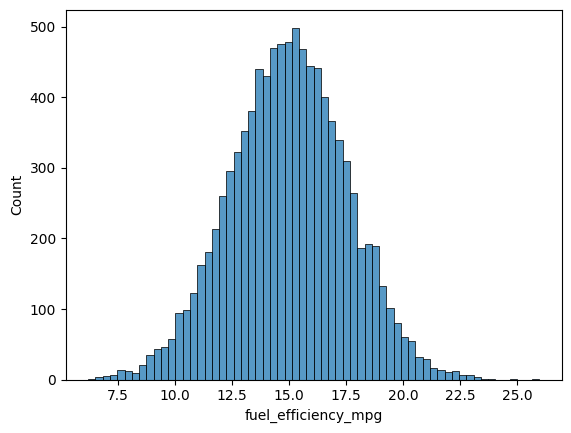

In [29]:
sns.histplot(df['fuel_efficiency_mpg'])

In [7]:
df['fuel_efficiency_mpg'].describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

In [33]:
df_filtered_features = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df_filtered_features.isnull().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [30]:
df_filtered_features = df_filtered_features.fillna(0)

<Axes: xlabel='horsepower', ylabel='Count'>

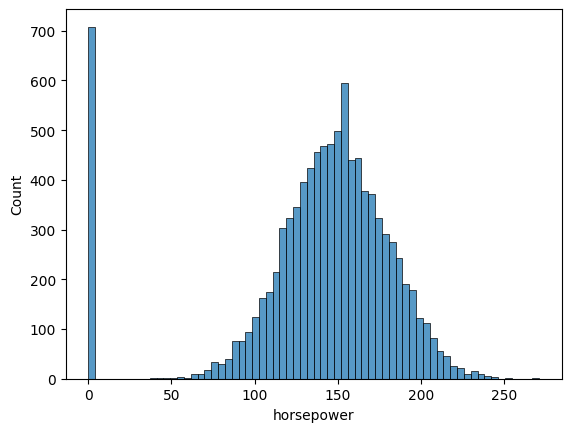

In [31]:
sns.histplot(df_filtered_features['horsepower'])

In [34]:
df_filtered_features['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

In [12]:
n = len(df_filtered_features)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

In [13]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [14]:
df_train = df_filtered_features.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_filtered_features.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_filtered_features.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [15]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_val['fuel_efficiency_mpg']

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [16]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [17]:
df_train_0 = df_train.copy()
df_train_mean = df_train.copy()

df_train_0.fillna(0, inplace=True)
df_train_mean.fillna(df_train.mean(), inplace=True)

In [21]:
def train_linear_regression(X: np.ndarray, y: pd.Series, r: float = 0.0) -> tuple([float, list[float]]):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def caluculate_rmse(y: pd.Series, y_predicted: pd.Series) -> float:
    e = y - y_predicted
    se = e ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)

    return rmse


In [19]:
# train model
w0_0, w_0 = train_linear_regression(df_train_0, y_train)

# predict y in validation set
y_val_pred_0 = w0_0 + df_val.dot(w_0)

rmse_0 = caluculate_rmse(y_val, y_val_pred_0)

In [20]:
# train model
w0_mean, w_mean = train_linear_regression(df_train_mean, y_train)

# predict y in validation set
y_val_pred_mean = w0_mean + df_val.dot(w_mean)

rmse_mean = caluculate_rmse(y_val, y_val_pred_mean)

In [21]:
round(rmse_0,2) == round(rmse_mean, 2)

np.False_

In [22]:
# train linear regression with regularization
rmse_dict = {}

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression(df_train_0, y_train, r=r)
    y_pred = w0 + df_val.dot(w)

    rmse_dict[r] = caluculate_rmse(y_val, y_pred)

rmse_dict

{0: np.float64(0.49686006869340205),
 0.01: np.float64(0.49659290515116444),
 0.1: np.float64(0.4983358451441611),
 1: np.float64(0.5019812821194237),
 5: np.float64(0.502667398496442),
 10: np.float64(0.5027610856493882),
 100: np.float64(0.502847211478211)}

Question 5

 - We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
 - Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
 - For each seed, do the train/validation/test split with 60%/20%/20% distribution.
 - Fill the missing values with 0 and train a model without regularization.
 - For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
 - What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
 - Round the result to 3 decimal digits (round(std, 3))


In [22]:
seed_scores = {}

for current_seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    idx = np.arange(n)

    np.random.seed(current_seed)
    np.random.shuffle(idx)

    df_train = df_filtered_features.iloc[idx[:n_train]].reset_index(drop=True)
    df_val = df_filtered_features.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
    df_test = df_filtered_features.iloc[idx[n_train+n_val:]].reset_index(drop=True)

    y_train = df_train['fuel_efficiency_mpg']
    y_val = df_val['fuel_efficiency_mpg']
    y_test = df_val['fuel_efficiency_mpg']

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    df_train_0 = df_train.copy()

    df_train_0.fillna(0, inplace=True)

    # train model
    w0_0, w_0 = train_linear_regression(df_train_0, y_train)

    # predict y in validation set
    y_val_pred_0 = w0_0 + df_val.dot(w_0)

    rmse_0 = caluculate_rmse(y_val, y_val_pred_0)

    seed_scores[current_seed] = rmse_0

seed_scores


{0: np.float64(0.498888990703643),
 1: np.float64(0.5011153598813093),
 2: np.float64(0.49835205128996946),
 3: np.float64(0.4899150265789404),
 4: np.float64(0.4916700004382306),
 5: np.float64(0.4978491889280649),
 6: np.float64(0.5065072587256144),
 7: np.float64(0.4916508629229706),
 8: np.float64(0.4843367004067603),
 9: np.float64(0.4964111668124666)}

In [24]:
round(np.std([*seed_scores.values()]), 3)

np.float64(0.006)

Question 6
 - Split the dataset like previously, use seed 9.
 - Combine train and validation datasets.
 - Fill the missing values with 0 and train a model with r=0.001.
 - What's the RMSE on the test dataset?

In [2]:
import pandas as pd
import numpy as np

def train_linear_regression(X: np.ndarray, y: pd.Series, r: float = 0.0) -> tuple([float, list[float]]):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

def caluculate_rmse(y: pd.Series, y_predicted: pd.Series) -> float:
    e = y - y_predicted
    se = e ** 2
    mse = se.mean()
    rmse = np.sqrt(mse)

    return rmse


df = pd.read_csv('car_fuel_efficiency.csv')
cols_to_use = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']

df_filtered_features = df[cols_to_use]

n = len(df_filtered_features)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df_filtered_features.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df_filtered_features.iloc[idx[n_train:n_train+n_val]].reset_index(drop=True)
df_test = df_filtered_features.iloc[idx[n_train+n_val:]].reset_index(drop=True)

y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_train_0 = pd.concat([df_train, df_val])
y_train_0 = pd.concat([y_train, y_val])

# fill missing values with 0
df_train_0.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# train model
w0_0, w_0 = train_linear_regression(df_train_0, y_train_0, r=0.001)


# predict y in validation set
y_test_pred_0 = w0_0 + df_test.dot(w_0)

rmse_0 = caluculate_rmse(y_test, y_test_pred_0)

rmse_0

np.float64(0.5156261299167999)